In [1]:
import tensorflow as tf
import numpy as np
tf.enable_eager_execution()
print(tf.__version__)

1.15.0


In [2]:
# AND 연산의 X1, X2 입력을 저장하는 배열
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
], dtype = "float32")
X

array([[0., 0.],
       [0., 1.],
       [1., 0.],
       [1., 1.]], dtype=float32)

In [3]:
# AND 연산의 y 출력을 저장하는 배열
y = np.array([
    [0],
    [0],
    [0],
    [1]
], dtype = "float32")
y

array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [4]:
# 선형회귀 함수의 기울기를 저장할 W 선언 기본값: 1, 2
w = tf.Variable([[1],[2]], dtype = "float32")
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [2.]], dtype=float32)>

In [5]:
# 선형회귀 함수의 절편을 저장할 b 선언 기본값: 3
# 곱해질 때만 차원이 같으면 된다 / 더해지는 것은 차원이 달라도 상관없음
b = tf.Variable([3], dtype = "float32")
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.], dtype=float32)>

In [6]:
X[3] * w

<tf.Tensor: id=21, shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [2., 2.]], dtype=float32)>

In [7]:
# tensorflow 에서의 곱 연산함수 / matmul()
tf.matmul(X, w)

<tf.Tensor: id=24, shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [2.],
       [1.],
       [3.]], dtype=float32)>

In [8]:
tf.matmul(
    np.array([
        [1,1]
    ], dtype = "float32")
    , w)

<tf.Tensor: id=27, shape=(1, 1), dtype=float32, numpy=array([[3.]], dtype=float32)>

In [9]:
# X와 w의 곱을 계산
tf.matmul(X,w)

<tf.Tensor: id=30, shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [2.],
       [1.],
       [3.]], dtype=float32)>

In [10]:
# X와 w의 곱을 계산하고 b를 더함
tf.matmul(X,w) + b

<tf.Tensor: id=35, shape=(4, 1), dtype=float32, numpy=
array([[3.],
       [5.],
       [4.],
       [6.]], dtype=float32)>

In [11]:
# tf.sigmoid(값1): 값1의 sigmoid 계산
# sigmoid = 값을 0 ~ 1 사이에 위치하게 해준다
# X와 w의 곱을 계산하고 b를 더하고 sigmoid 계산
tf.sigmoid(tf.matmul(X, w) + b)

<tf.Tensor: id=41, shape=(4, 1), dtype=float32, numpy=
array([[0.95257413],
       [0.9933072 ],
       [0.98201376],
       [0.9975274 ]], dtype=float32)>

In [12]:
# w와 b의 값을 자동으로 수정하는 Optimizer 객체를 생성
# 0.1 = learning rate
optimizer = tf.train.AdamOptimizer(0.1)

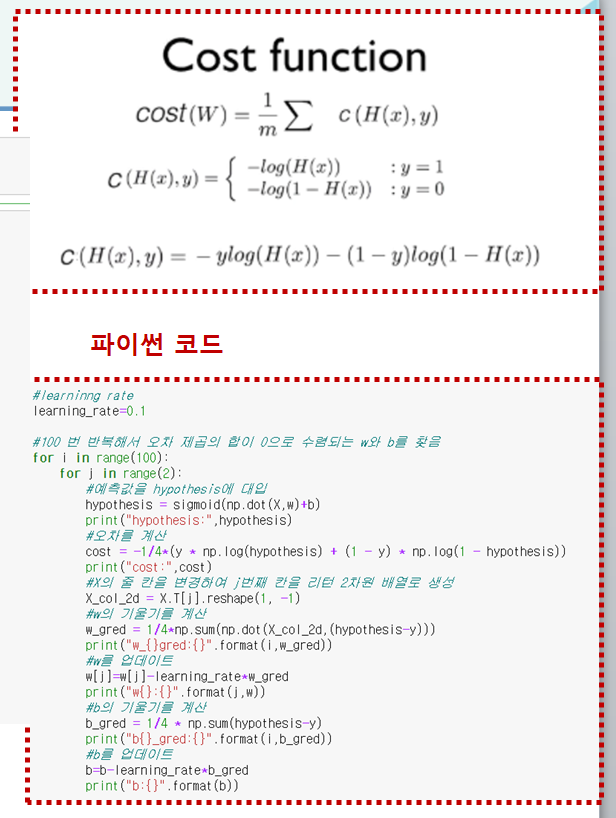

In [13]:
# 반복해서 w와 b를 찾음
# 3000번 반복했을 때 cost 값이 0에 가까웠다 / 그 이상하면 nan값 출력, 0을 지나쳤다
for step in range(3000):
    with tf.GradientTape() as tape:
        # tape가 기울기를 구해준다
        # 로지스틱 회귀식을 변수 hypothesis에 대입
        hypothesis = tf.sigmoid(tf.matmul(X, w) + b)
#         print("hypothesis: ", hypothesis)
        # 로지스틱 회귀식의 오차를 계산하는 계산식을 cost 변수에 대입
        # tensorflow에서 자동으로 오차를 가장 적게하는 w와 b를 찾아준다
        # tf.log(값1): 값1의 로그값을 계산
        # tf.reduce_mean(): 평균을 계산
        cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))
#         print("cost: ", cost)
        # cost, w, b를 이용하여 w의 기울기, b의 기울기를 계산해서 grads에 대입
        # tape.gradient(cost, [w, b]) = 기울기 계산
        grads = tape.gradient(cost, [w, b])
#         print("w: ", w)
#         print("b: ", b)
#         print("grads: ", grads) # 첫번째 출력값은 w의 기울기, 두번째 출력값은 b의 기울기
    # (zip(grads, [w, b]) 값을 출력하기 위해서 list 함수에 담아주었다
#     print("zip(grads, [w, b]): ", list(zip(grads, [w, b])))

    # grads에 저장된 w의 기울기와 b의 기울기를 w와 b에서 빼주고 w와 b로 업데이트
    optimizer.apply_gradients(grads_and_vars = zip(grads, [w, b]))
    # 업데이트 된 값 확인용
#     print("w: ", w)
#     print("b: ", b)
    
    if step % 100 == 0:
        print("=" * 50)
        print("step: {}, cost: {}, w: {}, b: {}".format(step, cost.numpy(), w.numpy(), b.numpy()))
        print("=" * 50)

step: 0, cost: 3.0189826488494873, w: [[0.9000001]
 [1.9000001]], b: [2.9]
step: 100, cost: 0.32037678360939026, w: [[1.3912959]
 [1.3822359]], b: [-2.2505958]
step: 200, cost: 0.1555452197790146, w: [[2.9193358]
 [2.92578  ]], b: [-4.495889]
step: 300, cost: 0.09438243508338928, w: [[3.9796786]
 [3.9852533]], b: [-6.072738]
step: 400, cost: 0.06363260746002197, w: [[4.8035784]
 [4.80883  ]], b: [-7.303062]
step: 500, cost: 0.045967377722263336, w: [[5.4754047]
 [5.480495 ]], b: [-8.307976]
step: 600, cost: 0.034870389848947525, w: [[6.0417705]
 [6.0467663]], b: [-9.155865]
step: 700, cost: 0.027425602078437805, w: [[6.5314407]
 [6.5363774]], b: [-9.8892975]
step: 800, cost: 0.022173630073666573, w: [[6.963216]
 [6.968111]], b: [-10.536224]
step: 900, cost: 0.018319640308618546, w: [[7.349948]
 [7.354814]], b: [-11.115794]
step: 1000, cost: 0.015400692820549011, w: [[7.7007637]
 [7.705608 ]], b: [-11.6416235]
step: 1100, cost: 0.013132084161043167, w: [[8.022336]
 [8.027164]], b: [-12.

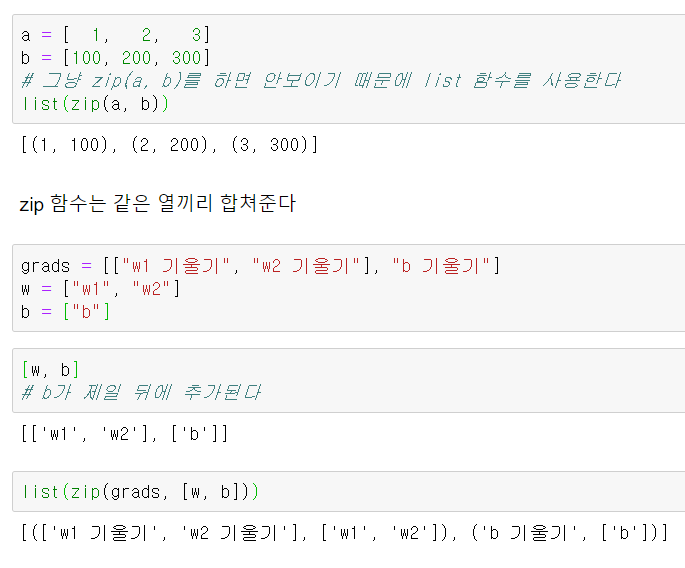

In [14]:
# 반복문을 사용하면 0 또는 1에 가까운 값이 출력된다
predict = tf.sigmoid(tf.matmul(X, w) + b)
predict

<tf.Tensor: id=189218, shape=(4, 1), dtype=float32, numpy=
array([[1.8809637e-08],
       [2.5123309e-03],
       [2.5004619e-03],
       [9.9702954e-01]], dtype=float32)>

In [15]:
# tf.cast(조건): 조건을 만족하는 데이터 혹은 True는 1로 변환
# 조건을 만족하지 못하는 데이터 혹은 False는 0으로 변환
# 0.5 초과는 1로 변환, 0.5 이하는 0으로 변환
predict01 = tf.cast(predict > 0.5, dtype = "float32")
predict01

<tf.Tensor: id=189221, shape=(4, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)>

In [16]:
y

array([[0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [17]:
# tf.equal(predict01, y): 조건을 만족하면 해당 줄칸에 True, 아니면 False return
# predict와 y가 같은지 확인하는 함수: equal
ac01 = tf.equal(predict01, y)
ac01

<tf.Tensor: id=189223, shape=(4, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True]])>

In [18]:
# tf.cast(): True는 1로 변환, False는 0으로 변환
ac02 = tf.cast(ac01, dtype = "float32")
ac02

<tf.Tensor: id=189224, shape=(4, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [19]:
# tf.reduce_mean(): 변환한 0과 1의 합을 구한 후에 데이터의 개수로 나눔
# ac03이 정확도
ac03 = tf.reduce_mean(ac02)
ac03

<tf.Tensor: id=189226, shape=(), dtype=float32, numpy=1.0>

In [20]:
# 정확도 계산식 풀어서
accuracy = tf.reduce_mean(tf.cast(tf.equal(predict01, y), dtype = tf.float32))
accuracy.numpy()

1.0

0.5, 0.3의 AND 연산 실행

기계에다가 값을 넣었을 때 예상결과값 출력

In [21]:
arr = np.array([[0.5, 0.3]], dtype = "float32")
arr

array([[0.5, 0.3]], dtype=float32)

In [22]:
predict = tf.sigmoid(tf.matmul(arr, w) + b)
predict

<tf.Tensor: id=189237, shape=(1, 1), dtype=float32, numpy=array([[0.00023696]], dtype=float32)>

In [23]:
# 0.5 이상 조건을 만족하면 1 만족하지 않으면 0 return
predict = tf.cast(predict > 0.5, dtype = tf.float32)
predict.numpy()
# 0.5, 0.3의 AND 연산 예측값 0

array([[0.]], dtype=float32)

연습연습

In [42]:
arr = np.array([[6, 6]], dtype = "float32")
arr

array([[6., 6.]], dtype=float32)

In [43]:
predict = tf.sigmoid(tf.matmul(arr, w) + b)
predict

<tf.Tensor: id=189300, shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

In [44]:
# 0.5 이상 조건을 만족하면 1 만족하지 않으면 0 return
predict = tf.cast(predict > 0.5, dtype = tf.float32)
predict.numpy()
# AND 연산 예측값 출력

array([[1.]], dtype=float32)